# Imports

In [12]:
pip install matplotlib

     |████████████████████████████████| 11.8 MB 8.3 MB/s eta 0:00:01
     |████████████████████████████████| 3.3 MB 4.0 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 6.8 MB/s eta 0:00:01
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
     |████████████████████████████████| 965 kB 6.8 MB/s eta 0:00:01
     |████████████████████████████████| 296 kB 7.5 MB/s eta 0:00:01
  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)
Note: you may need to restart the kernel to use updated packages.


In [24]:
import tensorflow as tf
import tensorflow_datasets as tfds
import keras


# Building dataset 

In [14]:
# Construct a tf.data.Dataset
ds = tfds.load('colorectal_histology', split='train', shuffle_files=True)

# Build your input pipeline
ds = ds.shuffle(1024).batch(32).prefetch(tf.data.AUTOTUNE)
for example in ds.take(1):
  image, label = example["image"], example["label"]


In [15]:
type(image)


tensorflow.python.framework.ops.EagerTensor

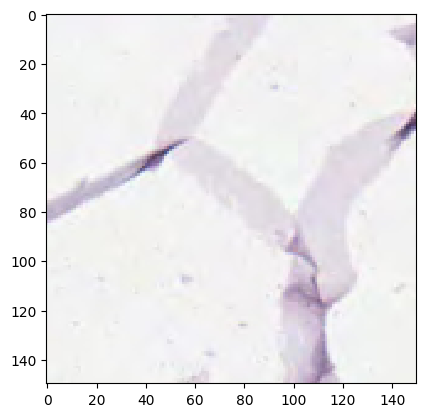

In [16]:
from matplotlib import pyplot as plt
plt.imshow(image[3], interpolation='nearest')
plt.show()

# Loading full datasest 

The dataset is made of 5000 images of 150x150 with 3 chanels

In [20]:
def make_data (train_test_ratio):
    ds = tfds.load('colorectal_histology', split='train', shuffle_files=True)
    X = []
    y = []
    for example in ds:
        X.append(example["image"])
        y.append(example["label"])
    X_train = X[:int(len(X)*train_test_ratio)]
    y_train = y[:int(len(X)*train_test_ratio)]
    X_test = X[int(len(X)*train_test_ratio):]
    y_test = y[int(len(X)*train_test_ratio):]
    return X_train, y_train, X_test, y_test

In [21]:
X_train, y_train, X_test, y_test = make_data(0.8)

### Baseline model

In [28]:
model = keras.Sequential([
    keras.layers.Dense()])

TypeError: The added layer must be an instance of class Layer. Received: layer=<class 'keras.layers.core.dense.Dense'> of type <class 'type'>.